2. Design a deep NN and optimize the network with Gradient Descent and optimize the same with Stochastic gradient descent(SGD)

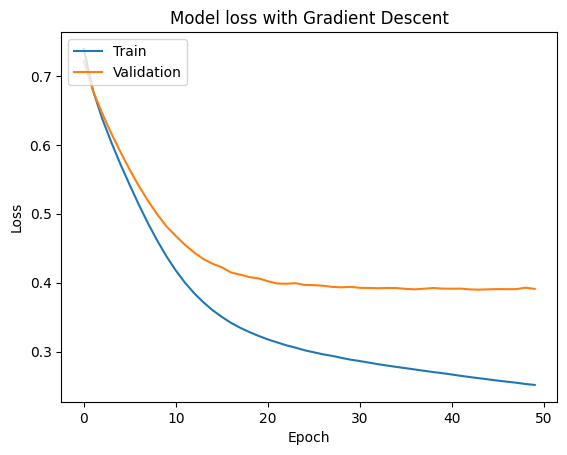

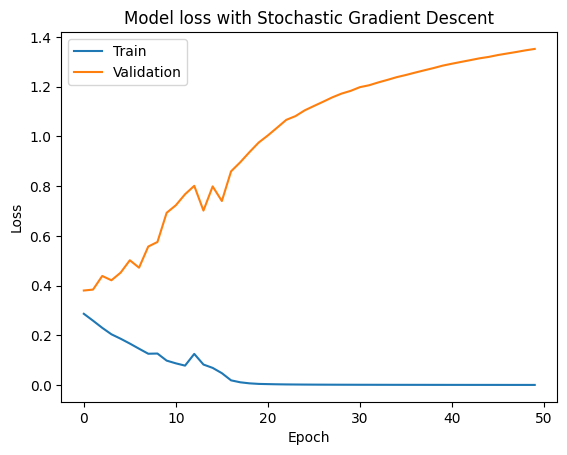

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=gd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history_gd = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history_sgd = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test), verbose=0)

plt.plot(history_gd.history['loss'])
plt.plot(history_gd.history['val_loss'])
plt.title('Model loss with Gradient Descent')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Model loss with Stochastic Gradient Descent')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()